<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/Practica-1-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Conectar la notebook en modo GPU

Entorno de ejecución → Cambiar tipo de entorno de ejecución

Algunas consideraciones:

* No dejar la notebook conectada sin actividad ya que Colab penaliza esto al asignar un entorno con GPU.
* No pedir el entorno con GPU si no se va a usar.

---

# ⭕ Parte I

Usando el mismo dataset MNIST de Keras, implementa las siguientes redes neuronales de tipo MLP:

* 1 capa oculta de 200 neuronas sin activación. Entrena durante 30 épocas.
* 1 capa oculta de 200 neuronas con activación $tanh$. Entrena durante 30 épocas.
* 3 capas ocultas de 100, 200 y 100 neuronas respectivamente, todas con activación ReLU. Entrena durante 50 épocas.

En cada uno de los experimentos determina las especificaciones de las capas de entrada y salida. Además, en cada caso, reporta el accuracy y recall en el conjunto de prueba, así como las curvas de entrenamiento (perdida y accuracy).

* Con el objetivo de subir la métrica de accuracy en el conjunto de prueba, entrena un nuevo módelo de red neuronal MLP cambiando los siguientes hiperparámetros:

 * Número de capas ocultas.
 * Número de neuronas en cada capa oculta.
 * Función de activación de cada capa oculta.
 * Optimizador ([opciones](https://keras.io/api/optimizers/)).


---


Como referencia, el mejor resultado hasta ahora, sin usar redes convolucionales, es un accuracy de 99.65% (https://arxiv.org/abs/1003.0358)

Lista de resultados: http://yann.lecun.com/exdb/mnist/, https://paperswithcode.com/sota/image-classification-on-mnist

## El conjunto de datos

In [2]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar los datos de MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

y_test_original = y_test.copy()  # Esta copia la usarás para hacer las evaluaciones de las métricas de rendimiento

# Normalizar los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Tu trabajo

Epoch 1/30
1875/1875 [==============================] - 11s 4ms/step - loss: 0.3581 - accuracy: 0.8980 - val_loss: 0.3161 - val_accuracy: 0.9091
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3049 - accuracy: 0.9156 - val_loss: 0.3016 - val_accuracy: 0.9146
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2932 - accuracy: 0.9175 - val_loss: 0.2861 - val_accuracy: 0.9218
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2854 - accuracy: 0.9216 - val_loss: 0.3043 - val_accuracy: 0.9166
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2810 - accuracy: 0.9212 - val_loss: 0.2808 - val_accuracy: 0.9201
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2764 - accuracy: 0.9234 - val_loss: 0.2796 - val_accuracy: 0.9258
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2737 - accuracy: 0.9230 - val_loss: 0.2852 - val_accuracy

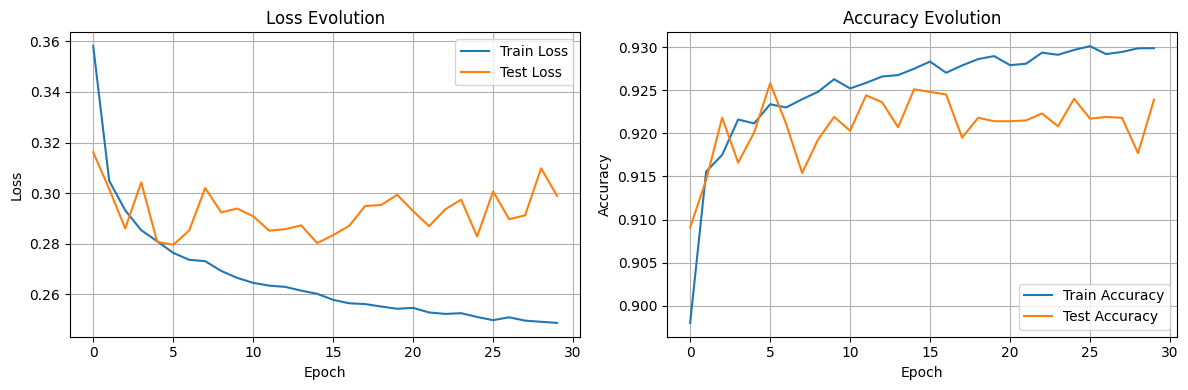

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#1. 1 capa oculta de 200 neuronas sin activación. Entrena durante 30 épocas.
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(200),
    Dense(10, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Calcular las métricas de rendimiento
print("Model 1:")
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
y_test_pred = model1.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_true_classes, y_test_pred_classes))

# Trazar las curvas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Test Loss')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2783 - accuracy: 0.9189 - val_loss: 0.1569 - val_accuracy: 0.9561
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1301 - accuracy: 0.9617 - val_loss: 0.1044 - val_accuracy: 0.9686
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9750 - val_loss: 0.0905 - val_accuracy: 0.9723
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598 - accuracy: 0.9819 - val_loss: 0.0789 - val_accuracy: 0.9753
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9871 - val_loss: 0.0823 - val_accuracy: 0.9740
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - accuracy: 0.9909 - val_loss: 0.0700 - val_accuracy: 0.9784
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9934 - val_loss: 0.0760 - val_accuracy:

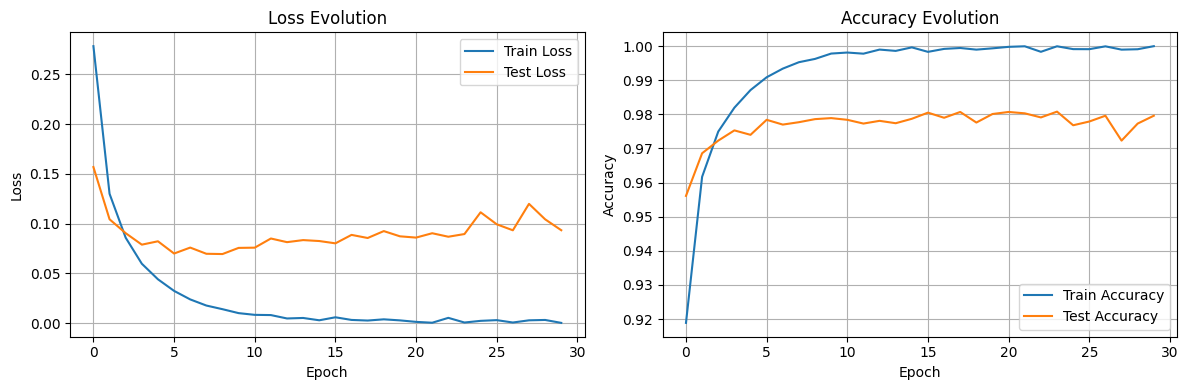

In [4]:
#2. 1 capa oculta de 200 neuronas con activación tanh. Entrena durante 30 épocas.
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(200, activation='tanh'),
    Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Calcular las métricas de rendimiento
print("Model 2:")
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
y_test_pred = model2.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
print(classification_report(y_test_original, y_test_pred_classes))

# Trazar las curvas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2276 - accuracy: 0.9321 - val_loss: 0.1374 - val_accuracy: 0.9589
Epoch 2/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1010 - accuracy: 0.9688 - val_loss: 0.1137 - val_accuracy: 0.9653
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0729 - accuracy: 0.9771 - val_loss: 0.0818 - val_accuracy: 0.9766
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.0762 - val_accuracy: 0.9779
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0978 - val_accuracy: 0.9709
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0772 - val_accuracy: 0.9777
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0832 - val_accura

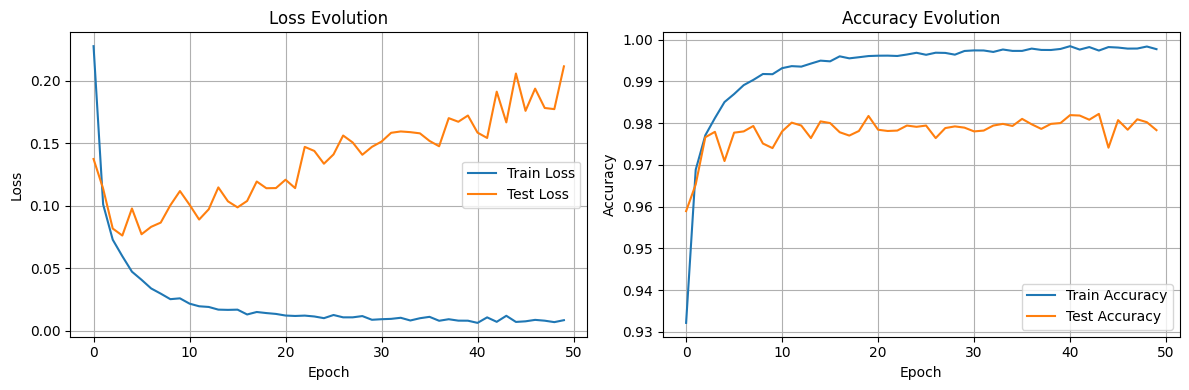

In [5]:
# 3 capas ocultas de 100, 200 y 100 neuronas respectivamente, todas con activación ReLU. Entrena durante 50 épocas.
model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Calcular las métricas de rendimiento
print("Model 3:")
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
y_test_pred = model3.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
print(classification_report(y_test_original, y_test_pred_classes))

# Trazar las curvas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Test Loss')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3911 - accuracy: 0.8876 - val_loss: 0.2042 - val_accuracy: 0.9379
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1717 - accuracy: 0.9480 - val_loss: 0.1380 - val_accuracy: 0.9582
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1192 - accuracy: 0.9641 - val_loss: 0.1167 - val_accuracy: 0.9646
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0904 - accuracy: 0.9725 - val_loss: 0.0878 - val_accuracy: 0.9715
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.0849 - val_accuracy: 0.9729
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0576 - accuracy: 0.9820 - val_loss: 0.0733 - val_accuracy: 0.9775
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0801 - val_accuracy:

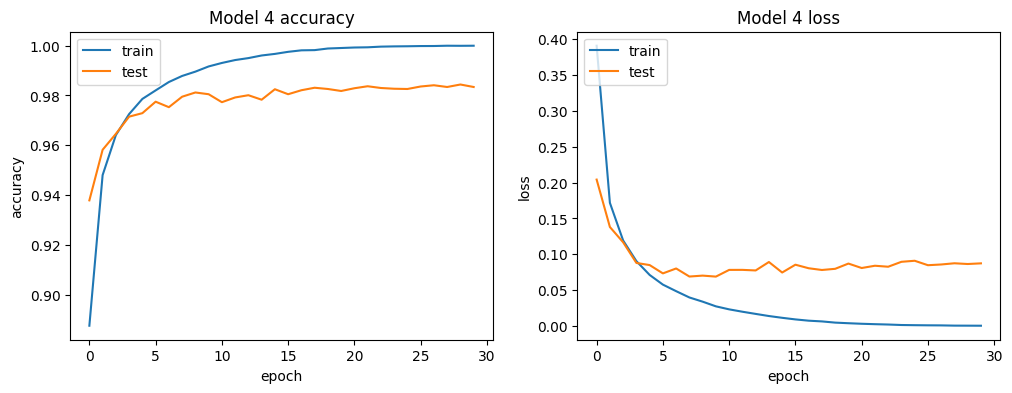

In [6]:
# 4. Modelo con 2 capas ocultas de 300 y 150 neuronas respectivamente, ambas con activación sigmoid
# Usaremos el optimizador RMSprop
model4 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(300, activation='sigmoid'),
    Dense(150, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model4.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

# Evaluar el modelo
print("Model 4:")
loss, accuracy = model4.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
y_pred = model4.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)
print(classification_report(y_test_classes, y_pred_classes))

# Generar las curvas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model 4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model 4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1976 - accuracy: 0.9398 - val_loss: 0.1246 - val_accuracy: 0.9631
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0891 - accuracy: 0.9726 - val_loss: 0.0750 - val_accuracy: 0.9765
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0624 - accuracy: 0.9810 - val_loss: 0.0935 - val_accuracy: 0.9736
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.1013 - val_accuracy: 0.9736
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.0814 - val_accuracy: 0.9772
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0734 - val_accuracy: 0.9799
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0944 - val_accurac

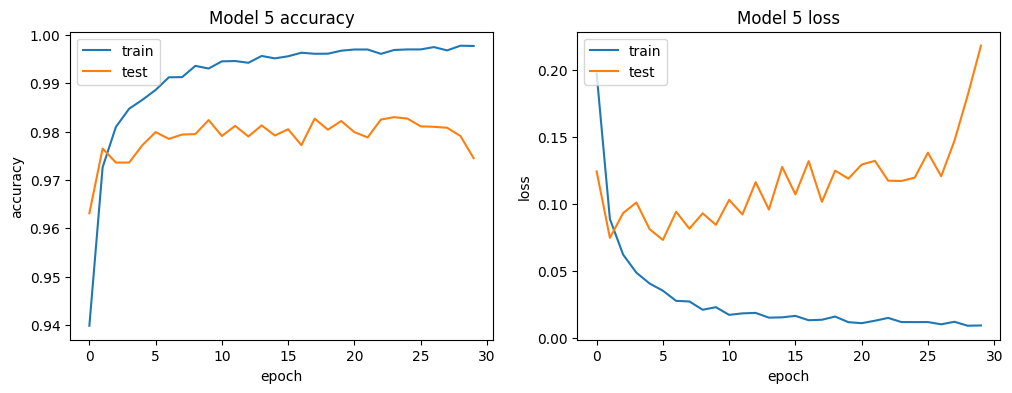

In [7]:
# 5. Modelo con 3 capas ocultas de 400, 300 y 200 neuronas respectivamente, todas con activación ReLU
# Usaremos el optimizador Adam
model5 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(10, activation='softmax')
])

model5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

# Evaluar el modelo
print("Model 5:")
loss, accuracy = model5.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
y_pred = model5.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)
print(classification_report(y_test_classes, y_pred_classes))

# Generar las curvas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model 5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model 5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2024 - accuracy: 0.9390 - val_loss: 0.0979 - val_accuracy: 0.9702
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0831 - accuracy: 0.9740 - val_loss: 0.0762 - val_accuracy: 0.9769
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0837 - val_accuracy: 0.9742
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0774 - val_accuracy: 0.9793
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0822 - val_accuracy: 0.9770
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0767 - val_accuracy: 0.9797
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0914 - val_accuracy:

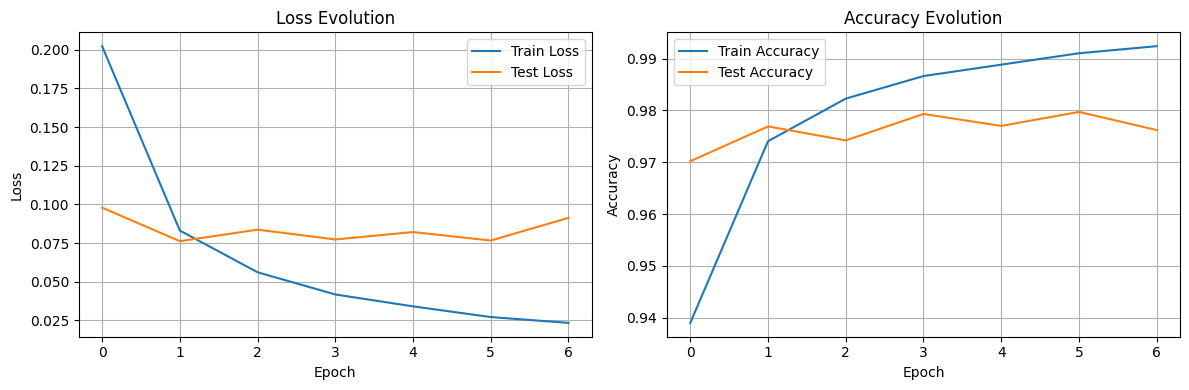

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

#6. 2 capas ocultas de 300 y 100 neuronas respectivamente, ambas con activación ReLU. Optimizador Adam.
# Define el modelo
model6 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compila el modelo
model6.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define el criterio para EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Entrena el modelo
history6 = model6.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evalúa las métricas de rendimiento
print("Model 6:")
loss, accuracy = model6.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
y_test_pred = model6.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_true_classes, y_test_pred_classes))

# Traza las curvas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history6.history['loss'], label='Train Loss')
plt.plot(history6.history['val_loss'], label='Test Loss')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4864 - accuracy: 0.8715 - val_loss: 0.2988 - val_accuracy: 0.9154
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2796 - accuracy: 0.9200 - val_loss: 0.2455 - val_accuracy: 0.9295
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2352 - accuracy: 0.9329 - val_loss: 0.2132 - val_accuracy: 0.9388
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2048 - accuracy: 0.9410 - val_loss: 0.1935 - val_accuracy: 0.9443
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1818 - accuracy: 0.9485 - val_loss: 0.1725 - val_accuracy: 0.9500
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1628 - accuracy: 0.9538 - val_loss: 0.1593 - val_accuracy: 0.9539
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1476 - accuracy: 0.9575 - val_loss: 0.1468 - val_accuracy:

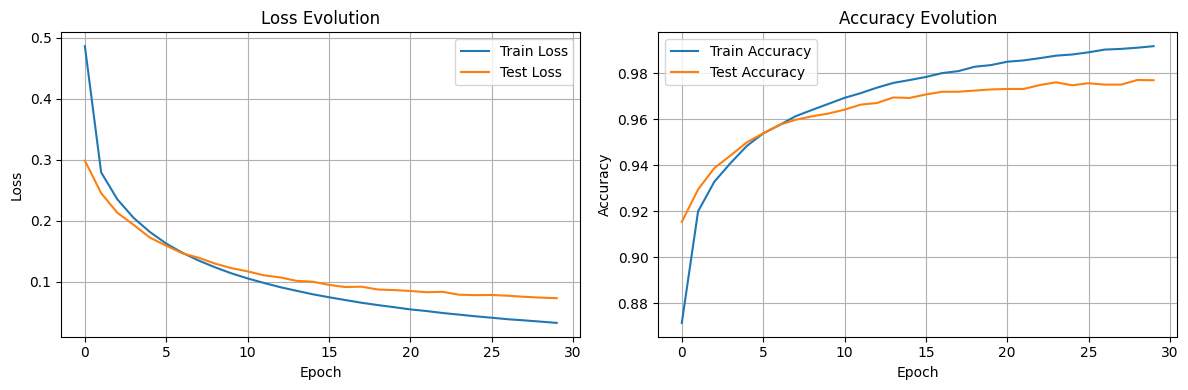

In [13]:
#7.  3 capas ocultas de 400, 200 y 100 neuronas respectivamente, todas con activación tanh. Optimizador SGD

from tensorflow.keras.optimizers import SGD

# Define el modelo
model7 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(400, activation='tanh'),
    Dense(200, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax')
])

# Compila el modelo
model7.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define el criterio para EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Entrena el modelo
history7 = model7.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evalúa las métricas de rendimiento
print("Model 7:")
loss, accuracy = model7.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
y_test_pred = model7.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_true_classes, y_test_pred_classes))

# Traza las curvas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history7.history['loss'], label='Train Loss')
plt.plot(history7.history['val_loss'], label='Test Loss')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# ⭕ Parte II

Tomando como referencia la [notebook](https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/02-MLP-Regresion.ipynb) de MLP para regresión, realiza las siguientes tareas. En las primeras 5 tareas el objetivo es experimentar y reflexionar sobre el efecto de distintos aspectos del entrenamiento en el rendimiento del modelo.

1. Repite el entrenamiendo del modelo usando 100 épocas **sin normalizar los datos**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

2. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con alguna función de activación en la capa de salida (tanh o sigmoide)**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

4. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con la función de activación ReLU en la capa de salida**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

5. Comprueba el modelo que entrenamos en la notebook (con 100 épocas, normalización y sin función de activación en la salida) con los siguientes algoritmos de ML clásico:
 * Regresión Lineal
 * Regresión Polinomial
 * Regresor KNN
 Comprueba los modelos usando MAE en el conjunto de prueba. ¿Cuál tuvo mejor desempeño?  

El objetivo en la siguiente tarea es experimentar para encontrar un mejor modelo que suba las métricas de rendimiento del modelo. **Cuidado con el overfitting.**

5. Usando los datos normalizados, prueba con diferentes combinaciones de los parámetros del módelo:
    * Número de capas ocultas
    * Número de nueronas en las capas ocultas
    * Funciones de activación de las capas ocultas
    * Optimizador y tasa de entrenamiento

 Puedes hacer el modelo más sencillo o más complejo. Reporta la combinación de parámetros que produjo el mejor resultado.

En esta última tarea probaras cómo es recibir nuevos datos para realizar predicciones con tu mejor modelo que hayas obtenido.

6. Ya que tengas tu mejor modelo, toma el archivo `mpg_new_data.csv` del repositorio y obten las predicciones para estos datos. Compararemos contra los valores reales. **Guarda estas predicciones en un archivo CSV, que también adjuntarás en la entrega de la actividad**.

## El conjunto de datos

Cargamos, limpiamos y separamos los datos

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"

df = pd.read_csv(url,
                header=0,
                index_col=0,
                na_values = "?",
                comment='\t',
                skipinitialspace=True)

df = df.dropna()
df = pd.get_dummies(data=df,columns=['Origin'],
                       drop_first=True,dtype=int)
df.rename(columns={'Origin_2':'Europe',
                   'Origin_3':'Japan'},
             inplace=True)
display(df)

X = df.iloc[:,1:].values
y = df['MPG'].values

print(f"Shapes de X y y: {X.shape}, {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=189)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0


Shapes de X y y: (390, 8), (390,)
Train size: 331
Test size: 59


Normalizamos

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

## Tu trabajo

### Entrenamiendo del modelo usando 100 épocas sin normalizar los datos,

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
import numpy as np

# Construye el modelo
def build_model():
    model = keras.Sequential([
    Input(shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model = build_model()

# Entrena el modelo
EPOCHS = 100

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 9321.6094 - mae: 40.3689 - mse: 9321.6094 - val_loss: 61.3460 - val_mae: 6.1083 - val_mse: 61.3460
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 83.9033 - mae: 7.3879 - mse: 83.9033 - val_loss: 75.2682 - val_mae: 6.8087 - val_mse: 75.2682
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 1337.0756 - mae: 27.0489 - mse: 1337.0756 - val_loss: 414.7543 - val_mae: 17.7514 - val_mse: 414.7543
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 724.6213 - mae: 22.8882 - mse: 724.6213 - val_loss: 5086.5781 - val_mae: 69.7106 - val_mse: 5086.5781
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 1159.9429 - mae: 26.8007 - mse: 1159.9429 - val_loss: 349.1756 - val_mae: 15.9602 - val_mse: 349.1756
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 1168.8184 - mae: 29.7379 - mse: 1168.8184 - val_loss: 1922.7108 - val_mae:

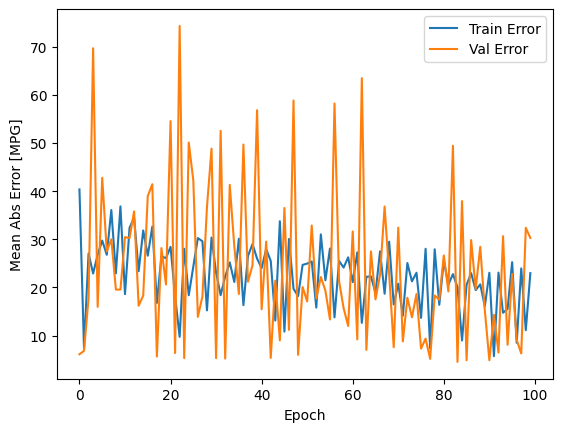

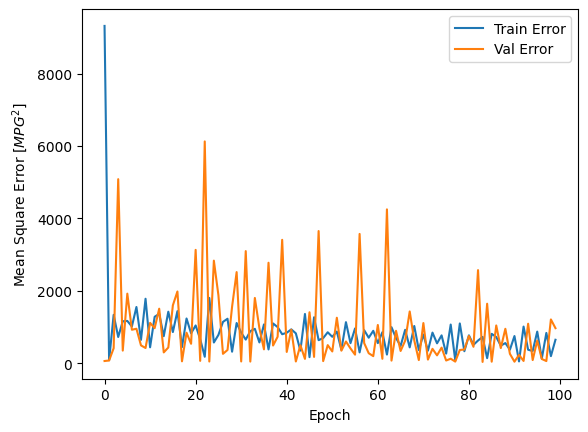

In [23]:
# Gráfica las métricas de rendimiento durante el entrenamiento
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(history.epoch, history.history['mae'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mae'],
            label = 'Val Error')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(history.epoch, history.history['mse'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mse'],
            label = 'Val Error')
    plt.legend()
    plt.show()

plot_history(history)

In [24]:
# Evalúa el Modelo
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print(f"MAE for the predictions on the test set: {np.round(mae,4)} MPG")


2/2 - 0s - loss: 1004.4382 - mae: 30.7694 - mse: 1004.4382 - 23ms/epoch - 11ms/step
MAE for the predictions on the test set: 30.7694 MPG


2/2 [==============================] - 0s 4ms/step


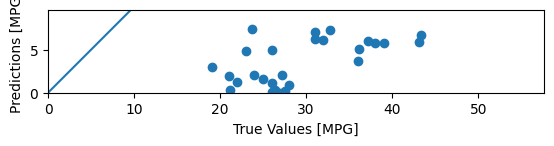

In [27]:
# Predice los valores MPG
y_pred = model.predict(X_test).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


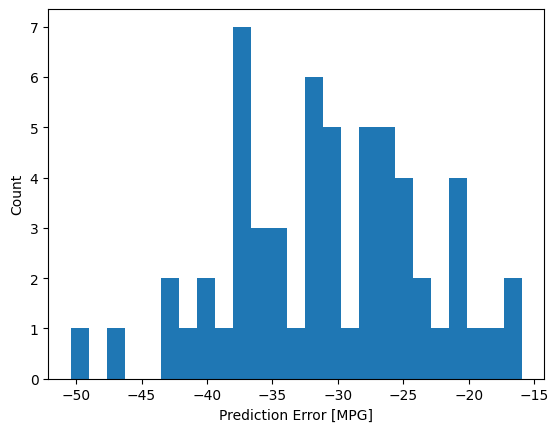

In [26]:
# Gráfica la distribución de errores
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

### Entrenamiendo del modelo usando 100 épocas sin normalizar los datos,

In [40]:
# Construye el modelo
def build_model():
    model = keras.Sequential([
    Input(shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='tanh')  # Puedes cambiar 'tanh' por 'sigmoid' si lo prefieres
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model = build_model()

# Entrena el modelo
EPOCHS = 100

history = model.fit(
  X_train_scl, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)


Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 599.0930 - mae: 23.1929 - mse: 599.0930 - val_loss: 567.5110 - val_mae: 22.6102 - val_mse: 567.5110
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 579.8078 - mae: 22.8032 - mse: 579.8078 - val_loss: 560.2047 - val_mae: 22.4575 - val_mse: 560.2047
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 575.1213 - mae: 22.7050 - mse: 575.1213 - val_loss: 557.6986 - val_mae: 22.4035 - val_mse: 557.6986
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 573.3639 - mae: 22.6672 - mse: 573.3639 - val_loss: 556.7001 - val_mae: 22.3814 - val_mse: 556.7001
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 572.5989 - mae: 22.6500 - mse: 572.5989 - val_loss: 556.1587 - val_mae: 22.3693 - val_mse: 556.1587
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 572.1920 - mae: 22.6406 - mse: 572.1920 - val_loss: 555.9007 - val_mae: 2

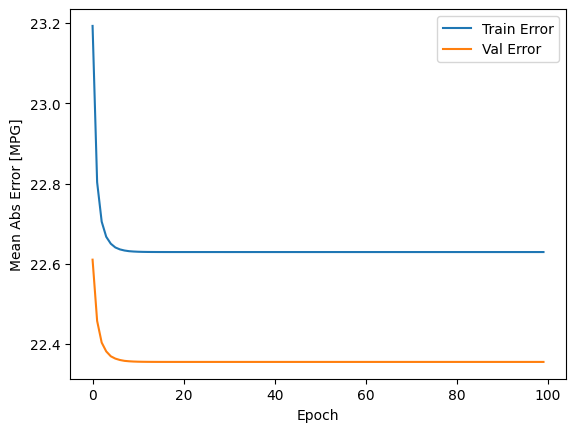

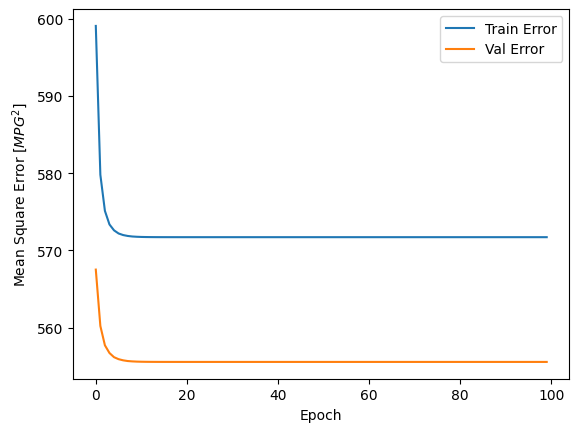

In [41]:
# Gráfica las métricas de rendimiento durante el entrenamiento
plot_history(history)

In [42]:
# Evalúa el Modelo
loss, mae, mse = model.evaluate(X_test_scl, y_test, verbose=2)

print(f"MAE for the predictions on the test set: {np.round(mae,4)} MPG")

2/2 - 0s - loss: 534.4680 - mae: 21.5237 - mse: 534.4680 - 32ms/epoch - 16ms/step
MAE for the predictions on the test set: 21.5237 MPG


2/2 [==============================] - 0s 6ms/step


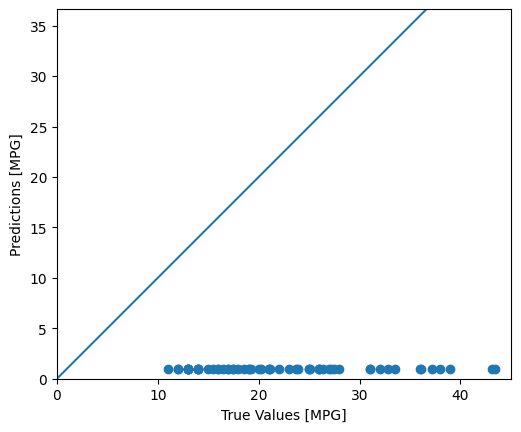

In [43]:
# Predice los valores MPG
y_pred = model.predict(X_test_scl).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

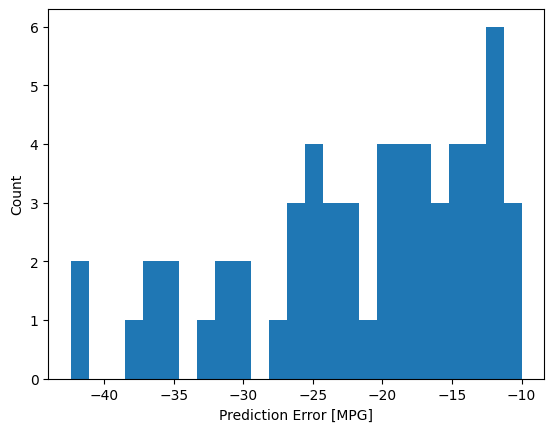

In [44]:
# Gráfica la distribución de errores
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

### Entrenamiendo del modelo usando 100 épocas, normalización de los datos y con la función de activación ReLU en la capa de salida

In [33]:
# Construye el modelo
def build_model():
    model = keras.Sequential([
    Input(shape=[X_train_scl.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='relu')  # Usamos ReLU como función de activación en la capa de salida
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model = build_model()

# Entrena el modelo
EPOCHS = 100

history = model.fit(
  X_train_scl, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 33ms/step - loss: 580.4048 - mae: 22.8867 - mse: 580.4048 - val_loss: 529.2471 - val_mae: 21.8353 - val_mse: 529.2471
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 520.3577 - mae: 21.5707 - mse: 520.3577 - val_loss: 473.6974 - val_mae: 20.5420 - val_mse: 473.6974
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 462.2344 - mae: 20.2051 - mse: 462.2344 - val_loss: 413.3863 - val_mae: 19.0637 - val_mse: 413.3863
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 397.2329 - mae: 18.6256 - mse: 397.2329 - val_loss: 347.6984 - val_mae: 17.3305 - val_mse: 347.6984
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 328.0814 - mae: 16.7875 - mse: 328.0814 - val_loss: 279.8166 - val_mae: 15.3666 - val_mse: 279.8166
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 257.9940 - mae: 14.7062 - mse: 257.9940 - val_loss: 213.8652 - val_m

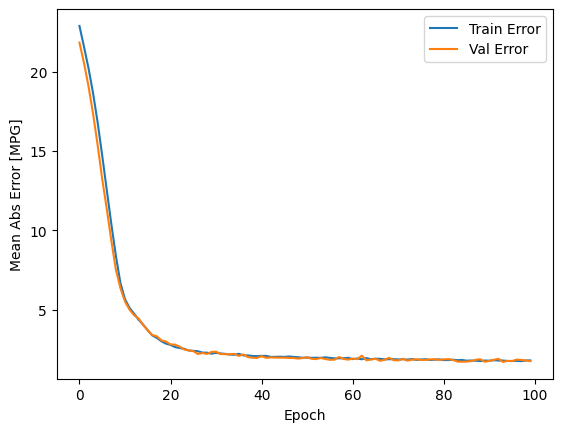

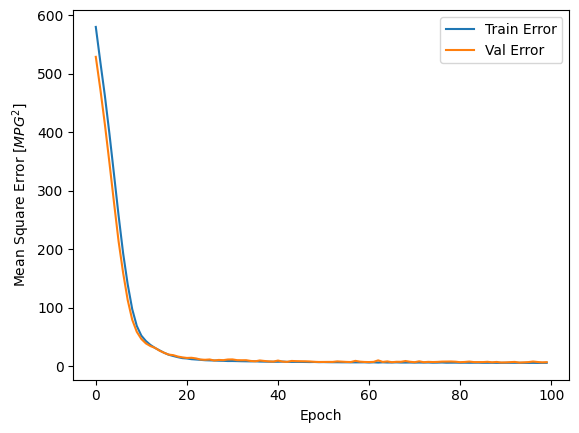

In [34]:
# Gráfica las métricas de rendimiento durante el entrenamiento
plot_history(history)

In [35]:
# Evalúa el Modelo
loss, mae, mse = model.evaluate(X_test_scl, y_test, verbose=2)

print(f"MAE for the predictions on the test set: {np.round(mae,4)} MPG")

2/2 - 0s - loss: 7.3836 - mae: 1.9736 - mse: 7.3836 - 31ms/epoch - 16ms/step
MAE for the predictions on the test set: 1.9736 MPG


2/2 [==============================] - 0s 4ms/step


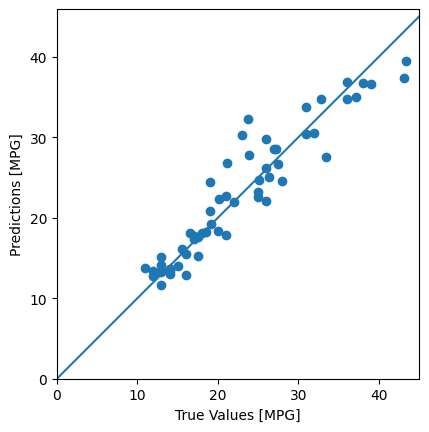

In [36]:
# Predice los valores MPG
y_pred = model.predict(X_test_scl).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

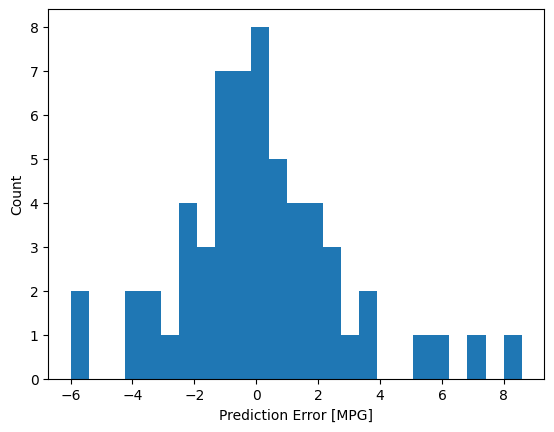

In [37]:
# Gráfica la distribución de errores
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

### Algoritmos de ML clásico

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Regresión Lineal
lr = LinearRegression()
lr.fit(X_train_scl, y_train)
y_pred_lr = lr.predict(X_test_scl)

# Regresión Polinomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scl)
X_test_poly = poly.transform(X_test_scl)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

# Regresor KNN
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scl, y_train)
y_pred_knn = knn.predict(X_test_scl)

# Cálculo de MAE y MSE para cada modelo
models = {'Regresión Lineal': y_pred_lr, 'Regresión Polinomial': y_pred_poly, 'KNN': y_pred_knn}
for name, y_pred in models.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - MAE: {mae}, MSE: {mse}")


Regresión Lineal - MAE: 2.924186600165399, MSE: 14.77033061485734
Regresión Polinomial - MAE: 2.3346133474576276, MSE: 9.97244070279396
KNN - MAE: 2.5056497175141246, MSE: 13.62702448210923


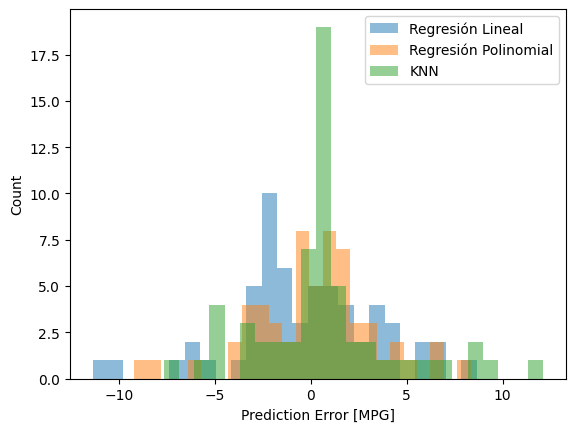

In [39]:
import matplotlib.pyplot as plt

# Predicciones y errores para cada modelo
predictions = {'Regresión Lineal': y_pred_lr, 'Regresión Polinomial': y_pred_poly, 'KNN': y_pred_knn}
errors = {name: pred - y_test for name, pred in predictions.items()}

# Gráfica de errores de predicción para cada modelo
for name, error in errors.items():
    plt.hist(error, bins=25, alpha=0.5, label=name)

plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.legend()
plt.show()


### Prueba con diferentes combinaciones de los parámetros del módelo

In [46]:
def build_model_experiment(hidden_layers, neurons, activation, learning_rate):
    model = keras.Sequential()
    model.add(Input(shape=[X_train_scl.shape[1]]))
    for i in range(hidden_layers):
        model.add(layers.Dense(neurons, activation=activation))
    model.add(layers.Dense(1))
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model


In [53]:
# Define los rangos de parámetros que deseas probar
hidden_layers_range = [2, 3, 4]
neurons_range = [64, 128, 256]
activation_range = ['relu', 'tanh']
learning_rate_range = [0.01, 0.001, 0.0001]

# Inicializa las variables para almacenar el mejor modelo y el menor error
best_model = None
lowest_mae = float('inf')
best_params = {}

# Bucle for anidado para recorrer todas las combinaciones de parámetros
for hidden_layers in hidden_layers_range:
    for neurons in neurons_range:
        for activation in activation_range:
            for learning_rate in learning_rate_range:
                # Construye y entrena el modelo con la combinación de parámetros actual
                model = build_model_experiment(hidden_layers, neurons, activation, learning_rate)
                history = model.fit(X_train_scl, y_train, epochs=100, validation_split = 0.2, verbose=0)

                # Evalúa el modelo en el conjunto de prueba
                loss, mae, mse = model.evaluate(X_test_scl, y_test, verbose=0)

                # Si el MAE actual es menor que el menor MAE registrado, actualiza el mejor modelo y el menor MAE
                if mae < lowest_mae:
                    best_model = model
                    lowest_mae = mae
                    best_params = {'hidden_layers': hidden_layers, 'neurons': neurons, 'activation': activation, 'learning_rate': learning_rate}
                    best_history = history  # Guarda el historial del mejor modelo


In [55]:
# Imprime el menor MAE
print(f"Lowest MAE on the test set: {lowest_mae} MPG")
print(f"Best parameters: {best_params}")

# Evalúa el Modelo
loss, mae, mse = best_model.evaluate(X_test_scl, y_test, verbose=2)

print(f"Loss for the predictions on the test set: {np.round(loss,4)}")
print(f"MAE for the predictions on the test set: {np.round(mae,4)} MPG")
print(f"MSE for the predictions on the test set: {np.round(mse,4)} MPG^2")

Lowest MAE on the test set: 1.7376917600631714 MPG
Best parameters: {'hidden_layers': 4, 'neurons': 128, 'activation': 'tanh', 'learning_rate': 0.001}
2/2 - 0s - loss: 5.8459 - mae: 1.7377 - mse: 5.8459 - 23ms/epoch - 12ms/step
Loss for the predictions on the test set: 5.8459
MAE for the predictions on the test set: 1.7377 MPG
MSE for the predictions on the test set: 5.8459 MPG^2


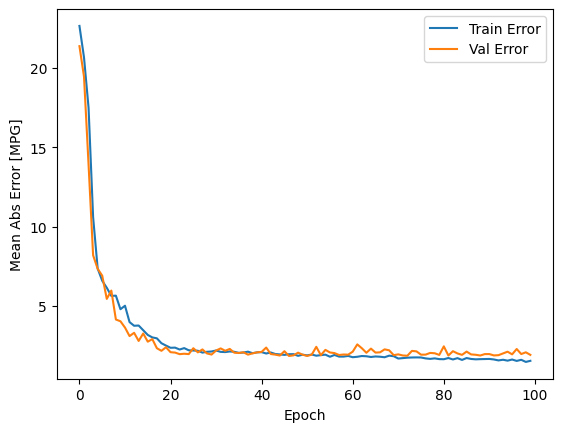

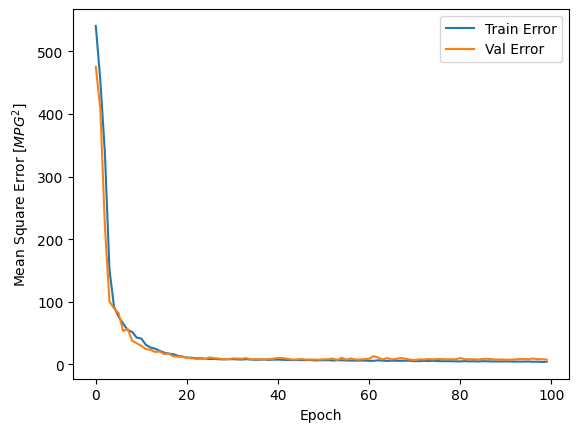

In [56]:
# Gráfica las métricas de rendimiento durante el entrenamiento del mejor modelo
plot_history(best_history)

2/2 [==============================] - 0s 4ms/step


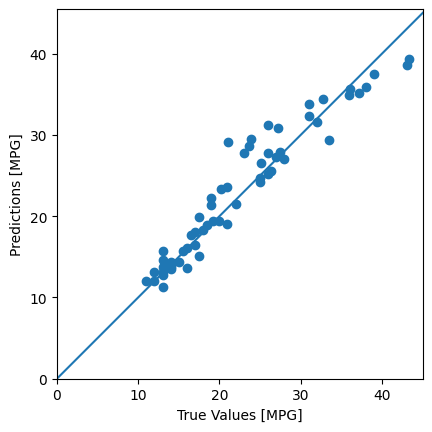

In [57]:
# Predice los valores MPG con el mejor modelo
y_pred = best_model.predict(X_test_scl).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

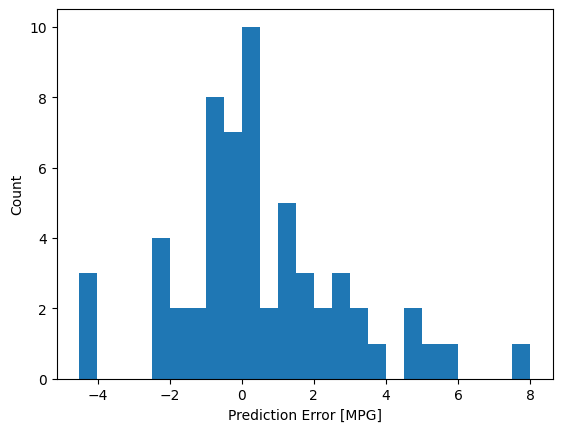

In [58]:
# Gráfica la distribución de errores del mejor modelo
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

In [61]:
# Guarda el mejor modelo en un archivo
best_model.save('best_model.keras')

In [59]:
# Lee el archivo mpg_new_data.csv desde el repositorio de GitHub
new_data = pd.read_csv('https://github.com/DCDPUAEM/DCDP/raw/main/04%20Deep%20Learning/data/mpg_new_data.csv')

# Normaliza los nuevos datos
new_data_scl = scaler.transform(new_data)

# Predice los valores MPG para los nuevos datos con el mejor modelo
predictions = best_model.predict(new_data_scl)

# Guarda las predicciones en un archivo CSV
np.savetxt("predictions.csv", predictions, delimiter=",")


1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
